In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage 
import scipy.cluster.hierarchy as sch
import seaborn as sns
import pickle 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [3]:
data=pd.read_csv("Questionnaire_3A (1).csv")

In [4]:
data.head()

,Timestamp,1-Quel est ton numéro étudiant ?,2-D'où viens tu ?,3-Quel parcours avez vous fait avant d’intégrer l'ensim,4-As-tu déjà passé le TOEIC ? Tu peux mettre ton score dans autre,5-Quelles sont les associations de l'ensim qui t’intéresse ?,5-Plutôt...,6-Quel est ton personnage de fiction préféré ?,7-Que fais-tu de ton temps libre ?,8-Quels sont tes films/séries préférées ?,...,13-Que penses-tu de ? [AndroidStudio],13-Que penses-tu de ? [Eclipse],13-Que penses-tu de ? [IntellJ],13-Que penses-tu de ? [LabView],13-Que penses-tu de ? [Unity],13-Que penses-tu de ? [UnrealEngine],13-Que penses-tu de ? [SublimeText],13-Que penses-tu de ? [Atom],13-Que penses-tu de ? [Anaconda],13-Que penses-tu de ? [Ionic]
0,2020/10/16 2:37:13 PM GMT+1,20173552,France,Prépa intégrée,Non,ENSIM'Elec,Apple;Android,TRUITEMan,Musculation jeux vidéos,Prison Break,...,Connais pas,Connais pas,Connais pas,Connais pas,J'aime bien,J'aime bien,J'aime bien,Connais pas,Connais pas,Connais pas
1,2020/10/16 2:37:18 PM GMT+1,20181588,France,Prépa intégrée,Non,Jensim;ENSIM is running;ENSIM'Elec,Android,Dark Vador,Conservatoire,Avengers,...,J'aime bien,Je n'aime pas,Connais pas,Connais pas,Je n'aime pas,Connais pas,Je suis fan,J'aime bien,Je suis fan,Connais pas
2,2020/10/16 2:39:33 PM GMT+1,20202834,Bretagne,DUT;Licence,Non,BDE;Abobinables,Android,Batman,Je vois des potes,Breaking bad,...,J'aime bien,J'aime bien,J'aime bien,Connais pas,J'aime bien,J'aime bien,Je suis fan,Je n'aime pas,Je n'aime pas,Connais pas
3,2020/10/16 2:39:53 PM GMT+1,20181973,France,Prépa intégrée,Non,Infographie;ENSIM is running,Android,Thomas Shelby,Se perdre sur youtube,"Peaky blinders, Breaking bad, Inception, inter...",...,Connais pas,J'aime bien,Connais pas,Connais pas,Connais pas,Connais pas,Je suis fan,Connais pas,J'aime bien,Connais pas
4,2020/10/16 2:40:04 PM GMT+1,182457,France;Occitanie,Prépa intégrée,Non,BDE;Cultu;Infographie;MAO;ENSIMIEN;ENSIM is ru...,Android,Luffy,Ne3ess,"Peaky Blinders, Got, les animes en general",...,Connais pas,Je suis fan,Connais pas,Connais pas,Connais pas,J'aime bien,J'aime bien,Connais pas,J'aime bien,Connais pas


In [5]:
data.shape

(37, 39)

In [6]:
data.isnull().sum()

Timestamp                                                                             0
1-Quel est ton numéro étudiant ?                                                      0
2-D'où viens tu ?                                                                     0
3-Quel parcours avez vous fait avant d’intégrer l'ensim                               0
4-As-tu déjà passé le TOEIC ? Tu peux mettre ton score dans autre                     0
5-Quelles sont les associations de l'ensim qui t’intéresse ?                          0
5-Plutôt...                                                                           0
6-Quel est ton personnage de fiction préféré ?                                        0
7-Que fais-tu de ton temps libre ?                                                    0
8-Quels sont tes films/séries préférées ?                                             0
9-Quel est ton navigateur préféré ?                                                   0
10-Quel langage de programmation

In [7]:
data["6-Quel est ton personnage de fiction préféré ?"].unique()

array(['TRUITEMan', 'Dark Vador', 'Batman', 'Thomas Shelby', 'Luffy',
       'Le biberon des imbibés', 'Roland of Gilead', 'Aucune idée ',
       'Kirby', 'Zeldo', 'Link ', 'Vivien Reid', 'Lucky Luke',
       'Diego de Umbrella Academy ', 'Nausicaa de la vallée du vent',
       'Diane (dans Bojack Horseman)', 'Sangoku',
       'Mara des Acoma (Guerres de la faille, Raymond E. FEIST)',
       'Guts de Berserk', 'Spiderman', 'Naruto',
       'Hachiman Hikigaya from Oregairu.', 'Lucifer', 'Jhon wick',
       'Garrius', 'Wonder Woman ', 'Ironman', 'Jack Sparrow', 'Braum',
       'Abe no Seimei', 'Gon', 'Eragon', 'Rick Deckard',
       'Je sais pas trop ', 'Killua (hxh)', 'Gen xmen', 'Christian Grey '],
      dtype=object)

In [8]:
data2=data.drop(columns=['Timestamp']);

In [9]:
data2.dtypes

1-Quel est ton numéro étudiant ?                                                       int64
2-D'où viens tu ?                                                                     object
3-Quel parcours avez vous fait avant d’intégrer l'ensim                               object
4-As-tu déjà passé le TOEIC ? Tu peux mettre ton score dans autre                     object
5-Quelles sont les associations de l'ensim qui t’intéresse ?                          object
5-Plutôt...                                                                           object
6-Quel est ton personnage de fiction préféré ?                                        object
7-Que fais-tu de ton temps libre ?                                                    object
8-Quels sont tes films/séries préférées ?                                             object
9-Quel est ton navigateur préféré ?                                                   object
10-Quel langage de programmation as-tu déjà utilisé ?                 

In [25]:
obj_data = data2.select_dtypes(include=['object']).copy()
obj_data.head()

,2-D'où viens tu ?,3-Quel parcours avez vous fait avant d’intégrer l'ensim,4-As-tu déjà passé le TOEIC ? Tu peux mettre ton score dans autre,5-Quelles sont les associations de l'ensim qui t’intéresse ?,5-Plutôt...,6-Quel est ton personnage de fiction préféré ?,7-Que fais-tu de ton temps libre ?,8-Quels sont tes films/séries préférées ?,9-Quel est ton navigateur préféré ?,10-Quel langage de programmation as-tu déjà utilisé ?,...,13-Que penses-tu de ? [AndroidStudio],13-Que penses-tu de ? [Eclipse],13-Que penses-tu de ? [IntellJ],13-Que penses-tu de ? [LabView],13-Que penses-tu de ? [Unity],13-Que penses-tu de ? [UnrealEngine],13-Que penses-tu de ? [SublimeText],13-Que penses-tu de ? [Atom],13-Que penses-tu de ? [Anaconda],13-Que penses-tu de ? [Ionic]
0,France,Prépa intégrée,Non,ENSIM'Elec,Apple;Android,TRUITEMan,Musculation jeux vidéos,Prison Break,Chrome,C;HTML5 CSS;Php;Python;Assembleur,...,Connais pas,Connais pas,Connais pas,Connais pas,J'aime bien,J'aime bien,J'aime bien,Connais pas,Connais pas,Connais pas
1,France,Prépa intégrée,Non,Jensim;ENSIM is running;ENSIM'Elec,Android,Dark Vador,Conservatoire,Avengers,Chrome,Java;C;C++;HTML5 CSS;Php;Python;JavaScript,...,J'aime bien,Je n'aime pas,Connais pas,Connais pas,Je n'aime pas,Connais pas,Je suis fan,J'aime bien,Je suis fan,Connais pas
2,Bretagne,DUT;Licence,Non,BDE;Abobinables,Android,Batman,Je vois des potes,Breaking bad,Chrome,Java;C;HTML5 CSS;Php;Python;JavaScript;Assembleur,...,J'aime bien,J'aime bien,J'aime bien,Connais pas,J'aime bien,J'aime bien,Je suis fan,Je n'aime pas,Je n'aime pas,Connais pas
3,France,Prépa intégrée,Non,Infographie;ENSIM is running,Android,Thomas Shelby,Se perdre sur youtube,"Peaky blinders, Breaking bad, Inception, inter...",Chrome;Firefox;Edge,C;HTML5 CSS;Python;JavaScript,...,Connais pas,J'aime bien,Connais pas,Connais pas,Connais pas,Connais pas,Je suis fan,Connais pas,J'aime bien,Connais pas
4,France;Occitanie,Prépa intégrée,Non,BDE;Cultu;Infographie;MAO;ENSIMIEN;ENSIM is ru...,Android,Luffy,Ne3ess,"Peaky Blinders, Got, les animes en general",Chrome,C;C++;HTML5 CSS;Python,...,Connais pas,Je suis fan,Connais pas,Connais pas,Connais pas,J'aime bien,J'aime bien,Connais pas,J'aime bien,Connais pas


In [26]:
data2_dict = obj_data.to_dict(orient='records') # turn each row as key-value pairs
# show X_dict
data2_dict;

In [27]:
# DictVectorizer
from sklearn.feature_extraction import DictVectorizer
# instantiate a Dictvectorizer object for X
data2_dv = DictVectorizer(sparse=False) 
# sparse = False makes the output is not a sparse matrix

In [28]:
# apply dv_X on X_dict
data_encoded = data2_dv.fit_transform(data2_dict)
# show X_encoded
data_encoded.shape

(37, 308)

In [29]:
# vocabulary
vocab = data2_dv.vocabulary_
# show vocab
print(type(vocab))

<class 'dict'>


In [30]:
new = pd.DataFrame.from_dict(data_encoded) 
new.head()

,0,1,2,3,4,5,6,7,8,9,...,298,299,300,301,302,303,304,305,306,307
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
dataf=pd.concat([data2["1-Quel est ton numéro étudiant ?"],pd.DataFrame(new,index=data2.index),] ,axis=1)
dataf.head()

,1-Quel est ton numéro étudiant ?,0,1,2,3,4,5,6,7,8,...,298,299,300,301,302,303,304,305,306,307
0,20173552,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20181588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20202834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20181973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,182457,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
new.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
303    float64
304    float64
305    float64
306    float64
307    float64
Length: 308, dtype: object

In [33]:
kmeans = KMeans(2)
kmeans.fit(new)
pred = kmeans.predict(new)
pred2=pred.reshape(-1,1)
pred2.shape

(37, 1)

In [34]:
df = pd.DataFrame(data=pred2,columns=["spécialité"])
df.head()

,spécialité
0,0
1,0
2,0
3,1
4,1


In [35]:
datafinale=pd.concat([df, new], axis=1)
datafinale.head()
#datafinale.shape

,spécialité,0,1,2,3,4,5,6,7,8,...,298,299,300,301,302,303,304,305,306,307
0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
#on fait classification supérvisé:

In [37]:
#1-equilibre entre les données?

In [38]:
X= datafinale.iloc[:, 1:307].values
y = datafinale.iloc[:,0].values

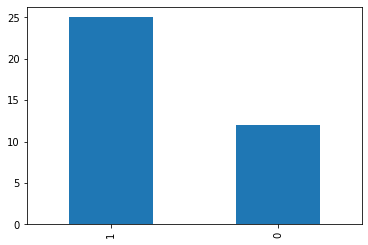

In [39]:
pd.Series(y).value_counts().plot(kind='bar');

In [40]:
#=> presence de déséquilibre

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2 , random_state=42)

In [42]:
from imblearn.metrics import classification_report_imbalanced

In [43]:
#RandomOverSampler

In [44]:
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)
# Entraînement du modèle de régression logistique
lr = LogisticRegression()
lr.fit(X_ro, y_ro)
# Affichage des résultats
y_pred = lr.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.33      1.00      0.71      0.50      0.85      0.73         1
          1       1.00      0.71      1.00      0.83      0.85      0.69         7

avg / total       0.92      0.75      0.96      0.79      0.85      0.70         8



In [45]:
#SMOTE

In [46]:
# SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)
# Entraînement du modèle de régression logistique
lr.fit(X_sm, y_sm)
# Affichage des résultats
y_pred = lr.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.33      1.00      0.71      0.50      0.85      0.73         1
          1       1.00      0.71      1.00      0.83      0.85      0.69         7

avg / total       0.92      0.75      0.96      0.79      0.85      0.70         8



In [47]:
#knn with RandomOverSampler

Text(0, 0.5, 'Erreur')

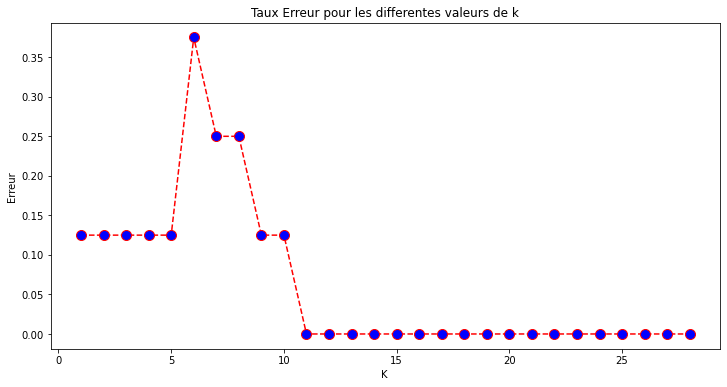

In [50]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1,29):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_ro, y_ro)
    pred_i = knn_model.predict(X_test)   
    
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 29), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [51]:
knn = KNeighborsClassifier(11)
knn_model = knn.fit(X_ro, y_ro)
y_pred_knn =knn_model.predict(X_test)

In [52]:
# Fit the model on training set
#model = LogisticRegression()
#model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(knn_model, open(filename, 'wb'))

In [53]:
y_pred_knn

array([1, 1, 1, 1, 1, 1, 1, 0])

In [54]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 1.00


In [55]:
print(type(X_test))

<class 'numpy.ndarray'>


In [56]:
arduino=data2["11-As-tu déjà utilisé ? [Une carte Arduino/Raspberry]"]
cao=data2["11-As-tu déjà utilisé ? [Des logiciels de CAO (solidworks)]"]
robot=data2["12-As-tu déjà réalisé ? [Un robot]"]
sysE=data2["12-As-tu déjà réalisé ? [Un système électronique (capteurs...)]"]
LabelView=data2["13-Que penses-tu de ? [LabView]"]

In [57]:
dataf=pd.concat([datafinale["spécialité"],arduino,cao,robot,sysE,LabelView] ,axis=1)
dataf.head()

,spécialité,11-As-tu déjà utilisé ? [Une carte Arduino/Raspberry],11-As-tu déjà utilisé ? [Des logiciels de CAO (solidworks)],12-As-tu déjà réalisé ? [Un robot],12-As-tu déjà réalisé ? [Un système électronique (capteurs...)],13-Que penses-tu de ? [LabView]
0,0,Un peu,Un peu,Régulièrement,Un peu,Connais pas
1,0,Régulièrement,Un peu,Régulièrement,Régulièrement,Connais pas
2,0,Un peu,Jamais,Jamais,Un peu,Connais pas
3,1,Un peu,Un peu,Jamais,Jamais,Connais pas
4,1,Un peu;Régulièrement,Un peu,Un peu,Un peu,Connais pas


In [58]:
dataf.loc[(dataf['11-As-tu déjà utilisé ? [Une carte Arduino/Raspberry]'] == 'Régulièrement') & (dataf['11-As-tu déjà utilisé ? [Des logiciels de CAO (solidworks)]'] == 'Régulièrement') & (dataf['12-As-tu déjà réalisé ? [Un robot]'] == 'Régulièrement') & (dataf['12-As-tu déjà réalisé ? [Un système électronique (capteurs...)]'] == 'Régulièrement')]

,spécialité,11-As-tu déjà utilisé ? [Une carte Arduino/Raspberry],11-As-tu déjà utilisé ? [Des logiciels de CAO (solidworks)],12-As-tu déjà réalisé ? [Un robot],12-As-tu déjà réalisé ? [Un système électronique (capteurs...)],13-Que penses-tu de ? [LabView]
24,0,Régulièrement,Régulièrement,Régulièrement,Régulièrement,J'aime bien


In [60]:
datafinale["spécialité"].replace(0, "ASTRE", inplace=True)
datafinale["spécialité"].replace(1, "IPS",inplace=True)
datafinale.head()

,spécialité,0,1,2,3,4,5,6,7,8,...,298,299,300,301,302,303,304,305,306,307
0,ASTRE,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ASTRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ASTRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IPS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,IPS,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


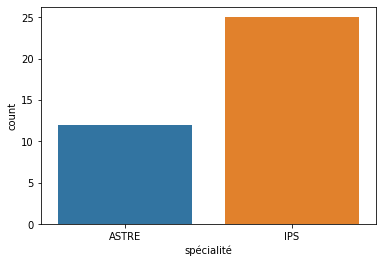

In [168]:
import seaborn as sns
sns.countplot(datafinale['spécialité'],label="count")
plt.show()


Text(0.5, 1.0, 'pourcentage de choix des étudiants')

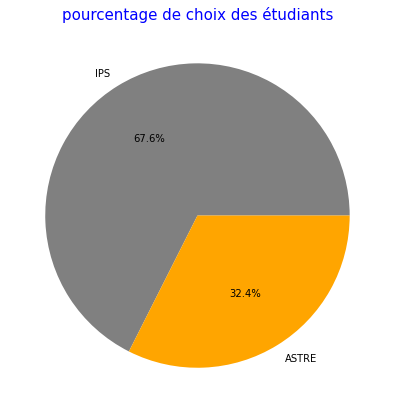

In [187]:
# Race rates according in kill data 
labels = datafinale.spécialité.value_counts().index
colors = ['grey','orange']
explode = [0,0]
sizes = datafinale.spécialité.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('pourcentage de choix des étudiants',color = 'blue',fontsize = 15)

In [61]:
y_pred_knn_test= pd.DataFrame(y_pred_knn).replace(0,"ASTRE")
y_pred_knn_test.replace(1, "IPS", inplace=True)

In [62]:
a=np.array(y_pred_knn_test)
#pour recuperer bel kaaba bel kaaba pouer tester

In [1094]:
#a2=np.array(y_pred_knn_f)
#pour recuperer bel kaaba bel kaaba pouer tester
#a2;

In [64]:
f=data2_dv.inverse_transform(X_test)
np.shape(f)
print(type(f))

<class 'list'>


In [151]:
#test pour la prédiction

In [65]:
print(f[7],a[7])

{'10-Quel langage de programmation as-tu déjà utilisé ?=Java;C#;HTML5 CSS;Php;Python;JavaScript;CMS': 1.0, '11-As-tu déjà utilisé ? [Des logiciels de CAO (solidworks)]=Un peu': 1.0, '11-As-tu déjà utilisé ? [Des logiciels de création de jeux vidéos (Unity, Unreal)]=Un peu': 1.0, '11-As-tu déjà utilisé ? [Des logiciels de montage vidéo]=Un peu': 1.0, '11-As-tu déjà utilisé ? [Des logiciels de retouche (Paint, Photoshop)]=Un peu': 1.0, '11-As-tu déjà utilisé ? [Linux]=Régulièrement': 1.0, '11-As-tu déjà utilisé ? [Mac]=Jamais': 1.0, '11-As-tu déjà utilisé ? [Une carte Arduino/Raspberry]=Régulièrement': 1.0, '11-As-tu déjà utilisé ? [Windows]=Tout le temps': 1.0, '12-As-tu déjà réalisé ? [Des logos]=Un peu': 1.0, '12-As-tu déjà réalisé ? [Un jeu video]=Jamais': 1.0, '12-As-tu déjà réalisé ? [Un logiciel sur pc]=Régulièrement': 1.0, '12-As-tu déjà réalisé ? [Un robot]=Jamais': 1.0, '12-As-tu déjà réalisé ? [Un système électronique (capteurs...)]=Un peu': 1.0, '12-As-tu déjà réalisé ? [Une 

In [66]:
X_test.shape

(8, 306)

In [67]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
#knn with smot

Text(0, 0.5, 'Erreur')

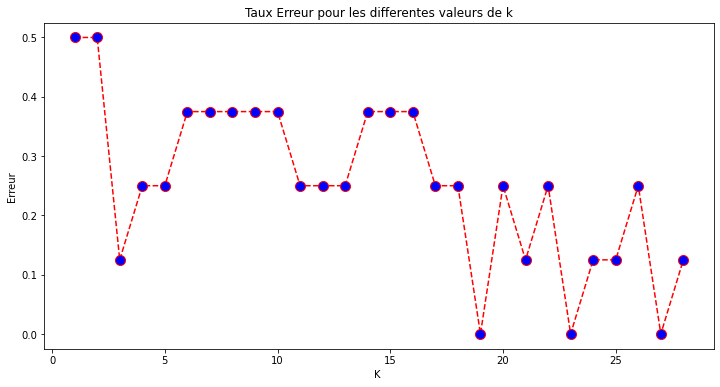

In [72]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1,29):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_sm, y_sm)
    pred_i = knn_model.predict(X_test)   
    
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 29), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [73]:
knn = KNeighborsClassifier(3)
knn_model = knn.fit(X_sm, y_sm)
y_pred_knn =knn_model.predict(X_test)

In [74]:
y_pred_knn

array([1, 1, 0, 1, 1, 1, 1, 0])

In [75]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.88


In [76]:
#decision tree with RandomOverSampler

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(X_ro, y_ro)
y_pred_dtc = dtc_model.predict(X_test)

In [78]:
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc.score(X_ro, y_ro)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc.score(X_test, y_test)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.88


In [79]:
#decision tree with SMOTE

In [80]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(X_sm, y_sm)
y_pred_dtc = dtc_model.predict(X_test)

In [81]:
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc.score(X_sm, y_sm)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc.score(X_test, y_test)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.88


In [82]:
#random forest with RandomOverSampler

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_ro, y_ro)
y_pred_rfc = rfc_model.predict(X_test)

In [84]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfc.score(X_ro, y_ro)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.75


In [85]:
#random forest with SMOTE

In [86]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_sm, y_sm)
y_pred_rfc = rfc_model.predict(X_test)

In [87]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfc.score(X_sm, y_sm)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.75


In [88]:
#pca with RandomOverSampler

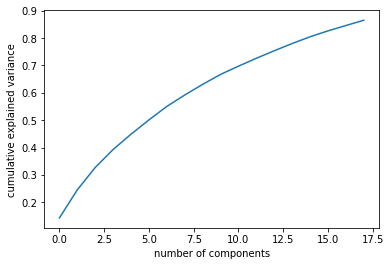

0.865125041189786
PCA(n_components=18)


In [89]:
pca = PCA(n_components=18)
X_train_pca = pca.fit_transform(X_ro)
X_test_pca = pca.transform(X_test)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
print(pca.explained_variance_ratio_.sum()) 
print(pca)

In [90]:
#knn with pca and RndomOverSampler

Text(0, 0.5, 'Erreur')

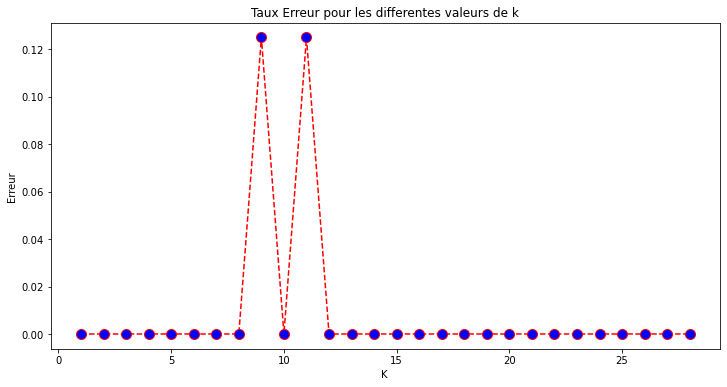

In [91]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1,29):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train_pca, y_ro)
    pred_i = knn_model.predict(X_test_pca)   
    
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 29), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [96]:
knn = KNeighborsClassifier(3)
knn_model = knn.fit(X_train_pca, y_ro)
y_pred_knn =knn_model.predict(X_test_pca)

In [97]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_pca, y_ro)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_pca, y_test)))

Accuracy of K-NN classifier on training set: 0.94
Accuracy of K-NN classifier on test set: 1.00


In [98]:
#pca with SMOTE

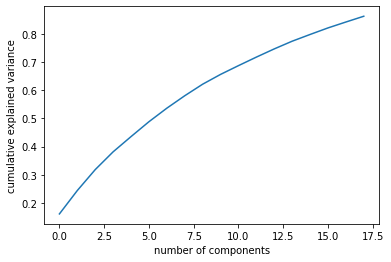

0.8625081746315117
PCA(n_components=18)


In [99]:
#kont hata 27
pca = PCA(n_components=18)
X_train_pca = pca.fit_transform(X_sm)
X_test_pca = pca.transform(X_test)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
print(pca.explained_variance_ratio_.sum()) 
print(pca)

In [100]:
#knn with pca and SMOTE

Text(0, 0.5, 'Erreur')

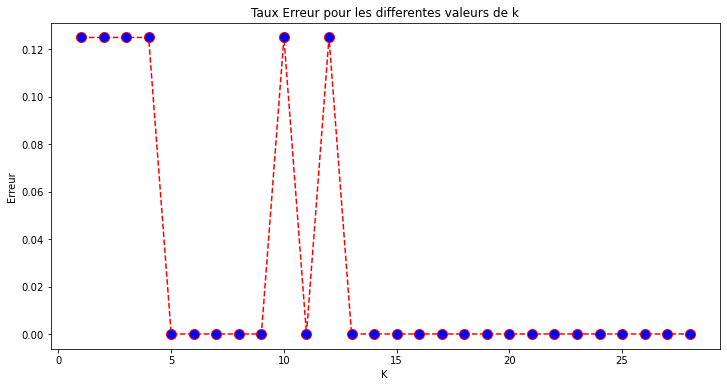

In [101]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1,29):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train_pca, y_sm)
    pred_i = knn_model.predict(X_test_pca)   
    
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 29), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [102]:
knn = KNeighborsClassifier(5)
knn_model = knn.fit(X_train_pca, y_sm)
y_pred_knn =knn_model.predict(X_test_pca)

In [103]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_pca, y_sm)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_pca, y_test)))

Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 1.00


In [107]:
filename = 'finalized_model2.pkl'
pickle.dump(knn_model, open(filename, 'wb'))

In [108]:
#knn with svd and RandomOverSampler

In [109]:
u, s, v = np.linalg.svd(X_ro, full_matrices=True)

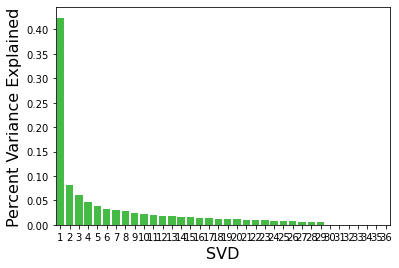

In [110]:
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
var_explained
 
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, color="limegreen")
plt.xlabel('SVD', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.savefig('svd_scree_plot.png',dpi=100)

In [111]:
from sklearn.decomposition import TruncatedSVD
svd =  TruncatedSVD(n_components = 18)
X_train_svd = svd.fit_transform(X_ro)
X_test_svd = svd.transform(X_test)
print("Singular values:")
print(svd.singular_values_)

Singular values:
[23.75449093 10.42668011  8.9070816   7.82517449  7.06689227  6.56327044
  6.34631156  6.14766906  5.61547148  5.47025985  5.29001687  4.79052634
  4.72252574  4.58798052  4.50927874  4.32637219  4.08414213  3.88399711]


Text(0, 0.5, 'Erreur')

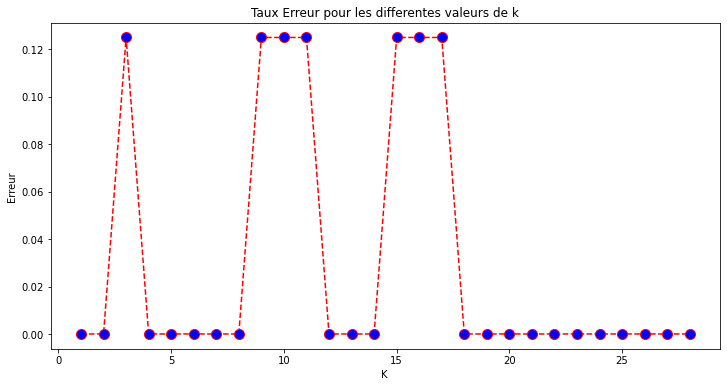

In [112]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1,29):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train_svd, y_ro)
    pred_i = knn_model.predict(X_test_svd)   
    
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 29), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [117]:
knn = KNeighborsClassifier(4)
knn_model = knn.fit(X_train_svd, y_ro)
y_pred_knn =knn_model.predict(X_test_svd)

In [118]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_svd, y_ro)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_svd, y_test)))

Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 1.00


In [119]:
#knn with svd and smote

In [120]:
u, s, v = np.linalg.svd(X_sm, full_matrices=True)

In [121]:
from sklearn.decomposition import TruncatedSVD
svd =  TruncatedSVD(n_components = 18)
X_train_svd = svd.fit_transform(X_sm)
X_test_svd = svd.transform(X_test)
print("Singular values:")
print(svd.singular_values_)

Singular values:
[23.51402646 10.71128725  7.69244007  7.34201275  6.76698182  6.23704811
  6.14323964  5.89404053  5.60995291  5.45423381  5.009451    4.72825108
  4.69190621  4.58839789  4.41171445  4.16199248  4.11130384  3.90083517]


Text(0, 0.5, 'Erreur')

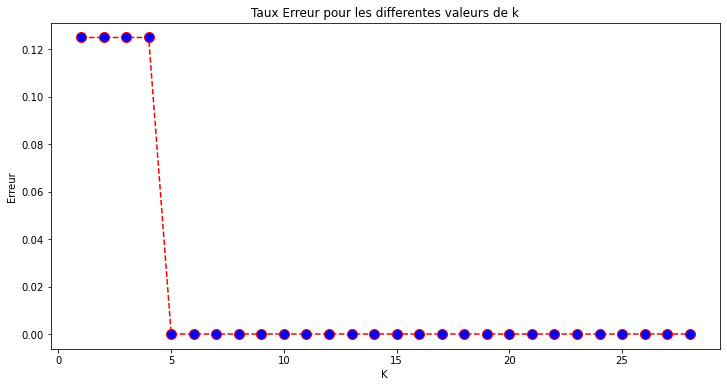

In [122]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1,29):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train_svd, y_sm)
    pred_i = knn_model.predict(X_test_svd)   
    
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 29), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [123]:
knn = KNeighborsClassifier(5)
knn_model = knn.fit(X_train_svd, y_sm)
y_pred_knn =knn_model.predict(X_test_svd)

In [124]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_svd, y_sm)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_svd, y_test)))

Accuracy of K-NN classifier on training set: 0.94
Accuracy of K-NN classifier on test set: 1.00


In [125]:
#decision tree with pca and RandomOverSampler

In [128]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(X_train_pca, y_ro)
y_pred_dtc = dtc_model.predict(X_test_pca)

In [130]:
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc.score(X_train_pca, y_ro)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc.score(X_test_pca, y_test)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.75


In [134]:
#decision tree with pca and smote

In [133]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(X_train_pca, y_sm)
y_pred_dtc = dtc_model.predict(X_test_pca)

In [135]:
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc.score(X_train_pca, y_sm)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc.score(X_test_pca, y_test)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.75


In [131]:
#decision tree with svd and RandomOverSampler

In [136]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(X_train_svd, y_ro)
y_pred_dtc = dtc_model.predict(X_test_svd)

In [137]:
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc.score(X_train_svd, y_ro)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc.score(X_test_svd, y_test)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.75


In [140]:
#decision tree with svd and smote

In [138]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(X_train_svd, y_sm)
y_pred_dtc = dtc_model.predict(X_test_svd)

In [139]:
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc.score(X_train_svd, y_sm)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc.score(X_test_svd, y_test)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.75


In [553]:
#random forest with pca and RandomOverSampler

In [141]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train_pca, y_ro)
y_pred_rfc = rfc_model.predict(X_test_pca)

In [142]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfc.score(X_train_pca, y_ro)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc.score(X_test_pca, y_test)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.75


In [143]:
#random forest with pca and smote

In [144]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train_pca, y_sm)
y_pred_rfc = rfc_model.predict(X_test_pca)

In [145]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfc.score(X_train_pca, y_sm)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc.score(X_test_pca, y_test)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.75


In [347]:
#random forest with svd and RandomOverSampler

In [146]:
from sklearn.ensemble import RandomForestClassifier
rfcv = RandomForestClassifier()
rfcv_model = rfcv.fit(X_train_svd, y_ro)
y_pred_rfc = rfcv_model.predict(X_test_svd)

In [147]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfcv.score(X_train_svd, y_ro)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfcv.score(X_test_svd, y_test)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.75


In [148]:
#random forest with svd and smote

In [149]:
from sklearn.ensemble import RandomForestClassifier
rfcv = RandomForestClassifier()
rfcv_model = rfcv.fit(X_train_svd, y_sm)
y_pred_rfc = rfcv_model.predict(X_test_svd)

In [150]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfcv.score(X_train_svd, y_sm)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfcv.score(X_test_svd, y_test)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.75


In [334]:
#svm with pca

In [337]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_pca, y_train)
y_predSVM = svclassifier.predict(X_test_pca)

In [339]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_predSVM))
print(classification_report(y_test,y_predSVM))

[[3 3]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.40      1.00      0.57         2

    accuracy                           0.62         8
   macro avg       0.70      0.75      0.62         8
weighted avg       0.85      0.62      0.64         8



In [340]:
#svm with svd

In [341]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_svd, y_train)
y_predSVM = svclassifier.predict(X_test_svd)

In [342]:
print(confusion_matrix(y_test,y_predSVM))
print(classification_report(y_test,y_predSVM))

[[2 4]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.33      1.00      0.50         2

    accuracy                           0.50         8
   macro avg       0.67      0.67      0.50         8
weighted avg       0.83      0.50      0.50         8



In [343]:
#svm simple

In [344]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_predSVM = svclassifier.predict(X_test)

In [345]:
print(confusion_matrix(y_test,y_predSVM))
print(classification_report(y_test,y_predSVM))

[[3 3]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.40      1.00      0.57         2

    accuracy                           0.62         8
   macro avg       0.70      0.75      0.62         8
weighted avg       0.85      0.62      0.64         8



In [ ]:
#CAH :

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [30]:
mat = linkage(new,method="ward", metric="euclidean")

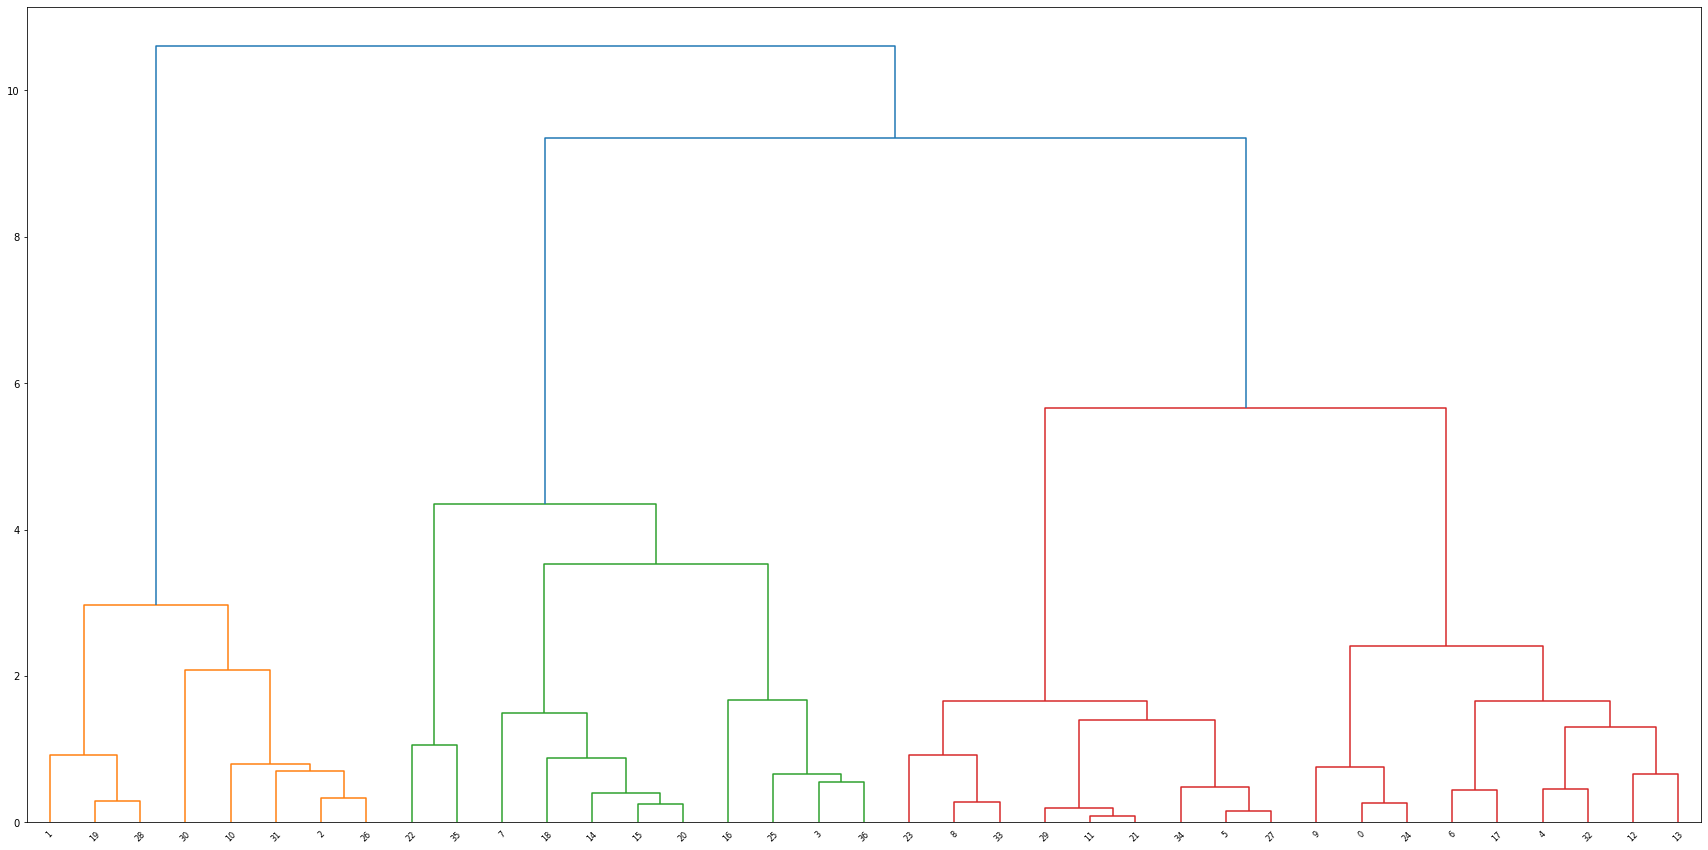

In [31]:
plt.figure(figsize=(30,15))
dendrogram(mat);